<a href="/assets/tutorial07_example.ipynb" class="link-button">Download</a>
<a href="https://colab.research.google.com/github/technion046195/technion046195/blob/master/content/tutorial07/example.ipynb" target="_blank">
<img src="../assets/colab-badge.svg" style="display:inline"/>
</a>

<center><h1>
תרגול 5  - דוגמא מעשית
</h1></center>

## Setup

In [ ]:
## Importing packages
import os # A build in package for interacting with the OS. For example to create a folder.
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package
import imageio  # A package to read and write image (is used here to save gif images)
import tabulate  # A package from pretty printing tables
from graphviz import Digraph  # A package for plothing graphs (of nodes and edges)

## Setup matplotlib to output figures into the notebook
## - To make the figures interactive (zoomable, tooltip, etc.) use ""%matplotlib notebook" instead
%matplotlib inline

## Setting some nice matplotlib defaults
plt.rcParams['figure.figsize'] = (4.5, 4.5)  # Set default plot's sizes
plt.rcParams['figure.dpi'] = 120  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## Auxiliary function for prining equations, pandas tables and images in cells output
from IPython.core.display import display, HTML, Latex, Markdown

## Create output folder
if not os.path.isdir('./output'):
    os.mkdir('./output')

### Data Inspection

In [ ]:
data_file = 'https://technion046195.netlify.app/datasets/nyc_taxi_rides.csv'

## Loading the data
dataset = pd.read_csv(data_file)

## Print the number of rows in the data set
number_of_rows = len(dataset)
display(Markdown(f'Number of rows in the dataset: $N={number_of_rows}$'))

## Show the first 10 rows
dataset.head(10)

Number of rows in the dataset: $N=100000$

,passenger_count,trip_distance,payment_type,fare_amount,tip_amount,pickup_easting,pickup_northing,dropoff_easting,dropoff_northing,duration,day_of_week,day_of_month,time_of_day
0,2,2.768065,2,9.5,0.00,586.996941,4512.979705,588.155118,4515.180889,11.516667,3,13,12.801944
1,1,3.218680,2,10.0,0.00,587.151523,4512.923924,584.850489,4512.632082,12.666667,6,16,20.961389
2,1,2.574944,1,7.0,2.49,587.005357,4513.359700,585.434188,4513.174964,5.516667,0,31,20.412778
3,1,0.965604,1,7.5,1.65,586.648975,4511.729212,586.671530,4512.554065,9.883333,1,25,13.031389
4,1,2.462290,1,7.5,1.66,586.967178,4511.894301,585.262474,4511.755477,8.683333,2,5,7.703333
5,5,1.561060,1,7.5,2.20,585.926415,4512.880385,585.168973,4511.540103,9.433333,3,20,20.667222
6,1,2.574944,1,8.0,1.00,586.731409,4515.084445,588.710175,4514.209184,7.950000,5,8,23.841944
7,1,0.804670,2,5.0,0.00,585.344614,4509.712541,585.843967,4509.545089,4.950000,5,29,15.831389
8,1,3.653202,1,10.0,1.10,585.422062,4509.477536,583.671081,4507.735573,11.066667,5,8,2.098333
9,6,1.625433,1,5.5,1.36,587.875433,4514.931073,587.701248,4513.709691,4.216667,3,13,21.783056


In [ ]:
x = dataset['duration'].values

## Train-test split

In [ ]:
n_samples = len(x)

## Generate a random generator with a fixed seed
rand_gen = np.random.RandomState(0)

## Generating a vector of indices
indices = np.arange(n_samples)

## Shuffle the indices
rand_gen.shuffle(indices)

## Split the indices into 80% train / 20% test
n_samples_train = int(n_samples * 0.8)
train_indices = indices[:n_samples_train]
test_indices = indices[n_samples_train:]

x_train = x[train_indices]
x_test = x[test_indices]

In [ ]:
x_grid = np.arange(0, x.max() + 0.001, 0.001)

## ECDF

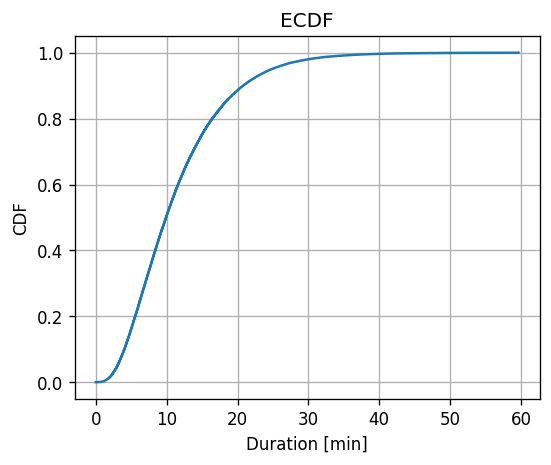

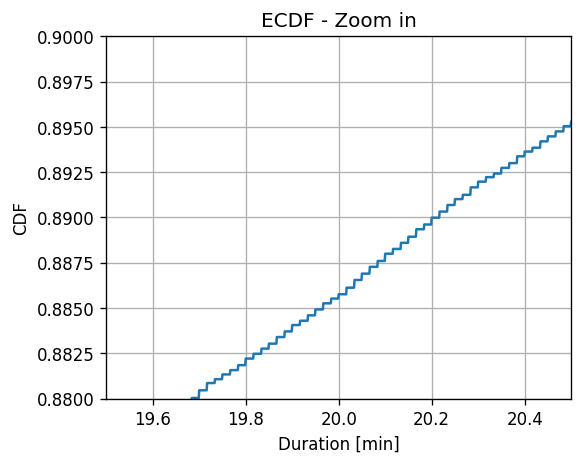

In [ ]:
def calculate_ecdf(x, x_grid):
    
    ## Initialize a an array for the calculated ECDF
    ecdf = np.zeros(x_grid.shape)
    
    ## Calculate the ECDF by definition
    for i, duration in enumerate(x_grid):   # enumerate adds an index to the list's values
        ecdf[i] = (x <= duration).mean()
    
    return ecdf
    
## Create the ECDF
ecdf = calculate_ecdf(x_train, x_grid)

# plot the ECDF
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(x_grid, ecdf)
ax.set_title('ECDF')
ax.set_ylabel('CDF')
ax.set_xlabel('Duration [min]')
fig.savefig('./output/nyc_duration_ecdf.png')

## Plot a zoomed in version
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(x_grid, ecdf)
ax.set_title('ECDF - Zoom in')
ax.set_ylabel('CDF')
ax.set_xlabel('Duration [min]')
ax.set_xlim(19.5, 20.5)
ax.set_ylim(0.88, 0.9);
fig.savefig('./output/nyc_duration_ecdf_zoom.png')

## Smaller datasets

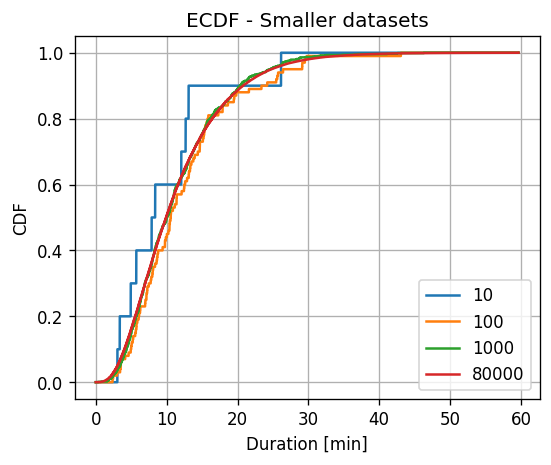

In [ ]:
## Create the figure and axis
fig, ax = plt.subplots(figsize=(5, 4))
ax.set_title('ECDF - Smaller datasets')
ax.set_ylabel('CDF')
ax.set_xlabel('Duration [min]')

## Generate a random generator for the sampling
rand_gen = np.random.RandomState(0)

for n_samples in [10, 100, 1000, len(x_train)]:
    x_smaller = rand_gen.choice(x_train, n_samples, replace=False)
    
    ## Create the ECDF
    ecdf = calculate_ecdf(x_smaller, x_grid)

    ## Plot the ECDF
    ax.plot(x_grid, ecdf, label=str(n_samples))

## Add a legend
ax.legend();
fig.savefig('./output/nyc_duration_ecdf_smaller.png')

## Histogram

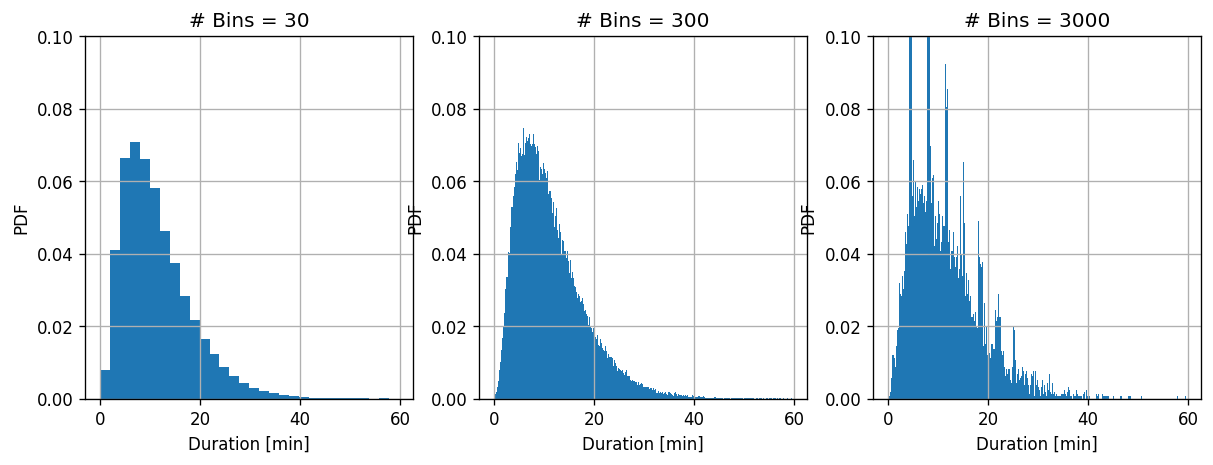

In [ ]:
def calculate_hist(x, n_bins):
    ## Define bins
    bins_edges = np.linspace(0, x.max() + 1e-9, n_bins + 1)
    bins_width = np.diff(bins_edges) ## Equal to running: bins[1:] - bins[:-1]

    ## Calculate the histogram
    hist_values = np.zeros(n_bins)
    for k in range(n_bins):
        hist_values[k] = \
            np.sum((x >= bins_edges[k]) & 
                   (x < bins_edges[k + 1])
                   ) / n_samples / bins_width[k]
    
    return hist_values, bins_edges, bins_width

## Prepare the figure
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
## Loop over the number of bins
for i, n_bins in enumerate((30, 300, 3000)):
    ## Calculate the histogram
    hist_values, bins_edges, bins_width = calculate_hist(x_train, n_bins)
    
    ## Plot the histogram
    ax = axes[i]
    ax.bar(bins_edges[:-1], hist_values, width=bins_width, align='edge');
    ax.set_title('# Bins = {}'.format(n_bins))
    ax.set_ylabel('PDF')
    ax.set_xlabel('Duration [min]')
    ax.set_ylim(0, 0.1)
fig.savefig('./output/nyc_duration_histogram.png')

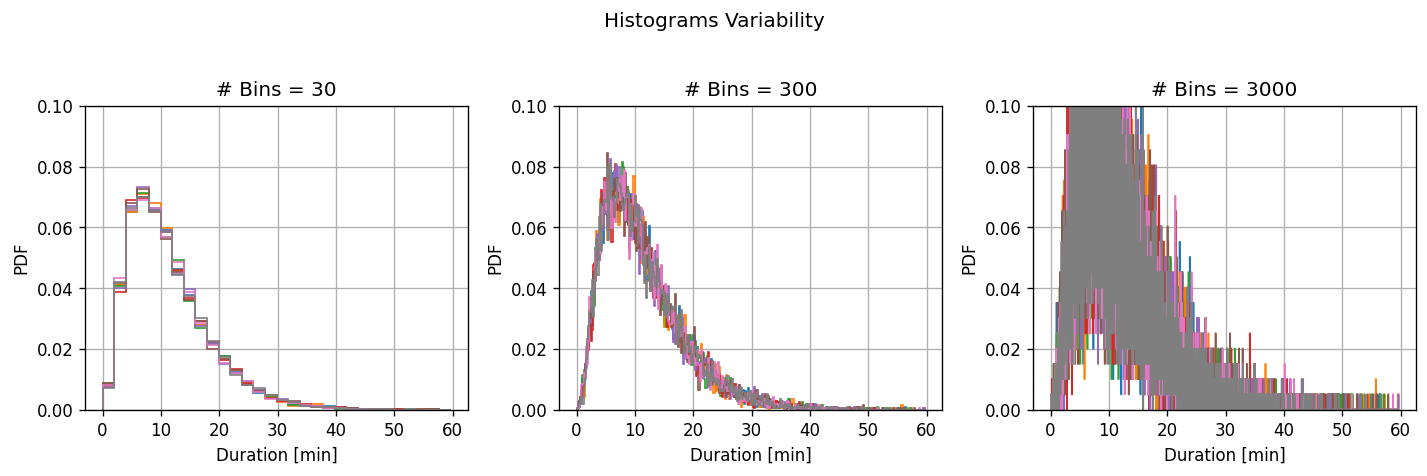

In [ ]:
## Generate a random generator for the shuffling
rand_gen = np.random.RandomState(0)
## Shuffle the array (the array is copied in order to preserve the order of the original array)
x_shuffled = x_train.copy()
rand_gen.shuffle(x_shuffled)
## Split the shuffled array
x_splited = np.split(x_shuffled, 8)

## Prepare the figure
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
## Loop over the number of bins
for i, n_bins in enumerate([30, 300, 3000]):
    ## Define bins
    bins_edges = np.linspace(0, x.max() + 1e-9, n_bins + 1)
    
    ## Loop over the subsets
    ax = axes[i]
    for x_subset in x_splited:
        ## Plot histogram
        ax.hist(x_subset, bins=bins_edges, density=True, histtype='step', fill=False);
    ax.set_title('# Bins = {}'.format(n_bins))
    ax.set_ylabel('PDF')
    ax.set_xlabel('Duration [min]')
    ax.set_ylim(0, 0.1)

fig.suptitle('Histograms Variability');
plt.tight_layout(rect=(0, 0, 1, 0.95))
fig.savefig('./output/nyc_duration_histogram_variance.png')

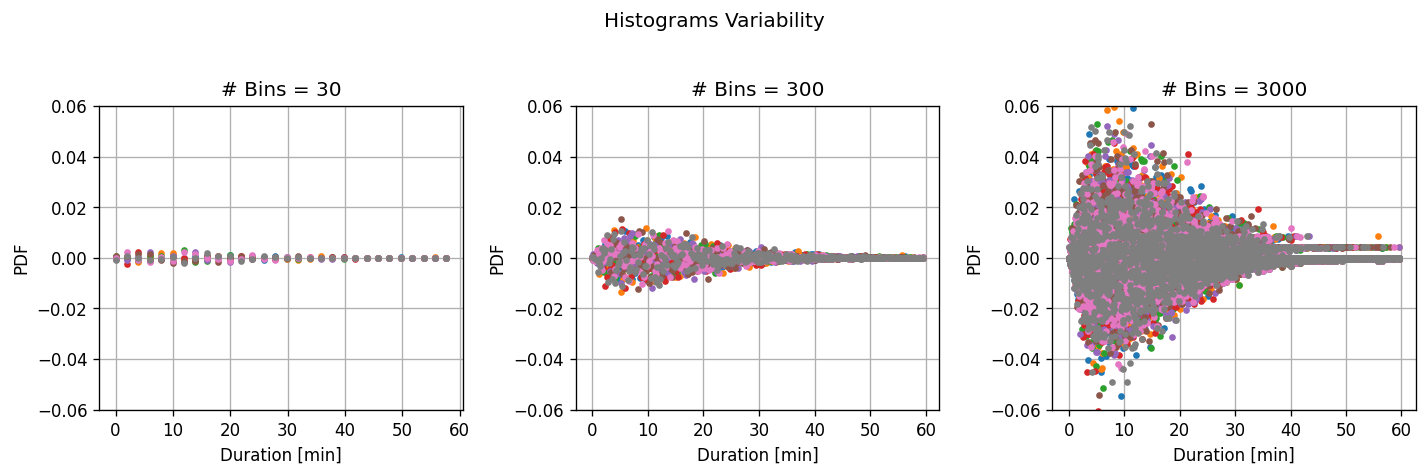

In [ ]:
## Prepare the figure
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
## Loop over the number of bins
for i, n_bins in enumerate([30, 300, 3000]):
    ## Define bins
    bins_edges = np.linspace(0, x.max() + 1e-9, n_bins + 1)
    
    ## Initialize an array to store the histograms values
    histograms = np.zeros((len(x_splited), len(bins_edges) - 1))
    
    ## Loop over the subsets
    for i_subset, x_subset in enumerate(x_splited):
        ## Calculate the histograms
        histograms[i_subset] = np.histogram(x_subset, bins=bins_edges, density=True)[0]

    ## Remove the mean value
    histograms_error = histograms - histograms.mean(axis=0)
    
    ## Loop over the subsets
    ax = axes[i]
    ax.plot(bins_edges[:-1], histograms_error.T, '.')
    ax.set_title('# Bins = {}'.format(n_bins))
    ax.set_ylabel('PDF')
    ax.set_xlabel('Duration [min]')
    ax.set_ylim(-0.06, 0.06)

fig.suptitle('Histograms Variability');
plt.tight_layout(rect=(0, 0, 1, 0.95))
fig.savefig('./output/nyc_duration_histogram_variance_no_mean.png')

## KDE

The rule of thumb suggests a bandwidth of $1.06\ \text{std}(x) N^{-\frac{1}{5}}\approx$0.775

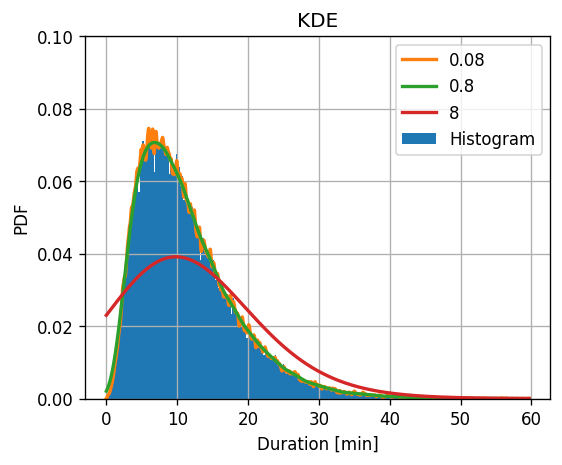

In [ ]:
## Calculate the suggested bandwidth
suggested_bandwidth = 1.06 * np.std(x_train) / n_samples ** (1 / 5.)
display(Markdown(r'The rule of thumb suggests a bandwidth of $1.06\ \text{std}(x) N^{-\frac{1}{5}}\approx$'
                 + f'{suggested_bandwidth:.3f}'))

def calculate_gaussian_kde(x, bandwidth, x_grid):
    ## Calculate a matrix of (x_grid_j - x_i)^2 
    delta_squared = (x_grid[:, None] - x[None, :]) ** 2

    ## Calculate the KDE
    kde = (1 / np.sqrt(2 * np.pi * bandwidth ** 2) * np.exp(- delta_squared / 2 / bandwidth ** 2)).mean(axis=1)
    
    return kde

## Define the grid
x_grid = np.arange(0, x.max() + 0.01, 0.01)

## Prepare the figure
fig, ax = plt.subplots(figsize=(5, 4))
ax.hist(x_train, bins=300 ,density=True, label='Histogram')
## Loop over the bandwidth
for i_bandwidth, bandwidth in enumerate([0.08, 0.8, 8]):
    ## Calculate KDE
    kde = calculate_gaussian_kde(x_train, bandwidth, x_grid)
    
    ## Plot histogram
    ax.plot(x_grid, kde, linewidth=2, label=str(bandwidth))

ax.set_title('KDE')
ax.set_ylabel('PDF')
ax.set_xlabel('Duration [min]')
ax.legend()
ax.set_ylim(0, 0.1)
fig.savefig('./output/nyc_duration_kde.png')

## Work hour prediction

In [ ]:
y = (dataset['time_of_day'].values > 7) & (dataset['time_of_day'].values < 18)
y_train = y[train_indices]
y_test = y[test_indices]

### Estimating $\hat{p}_{\text{y},\mathcal{D}}(y)$

In [ ]:
## Calculate the probability p_Y(1)
prob_y1 = y_train.mean()
display(Markdown(r'$\hat{p}_{\text{y},\mathcal{D}}(1)=$' + f'{prob_y1}'))

## Calculate the probability p_Y(0)
prob_y0 = (~y_train).mean()
display(Markdown(r'$\hat{p}_{\text{y},\mathcal{D}}(0)=$' + f'{prob_y0}'))


$\hat{p}_{\text{y},\mathcal{D}}(1)=$0.5138625

$\hat{p}_{\text{y},\mathcal{D}}(0)=$0.4861375

### Blind prediction

In [ ]:
predictions = 1
test_score = (y_test != predictions).mean()
display(Markdown(f'The test score is: {test_score}'))

The test score is: 0.4923

### Estimating $\hat{p}_{\text{x}|\text{y},\mathcal{D}}(x|y)$

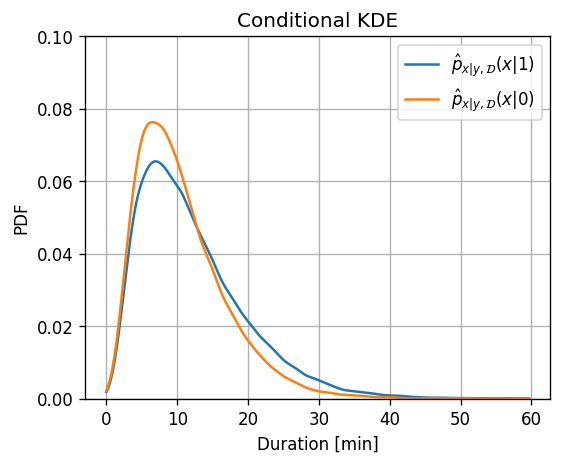

In [ ]:
## Import the KDE class from scikit-learn
from sklearn.neighbors import KernelDensity

## Define the grid
x_grid = np.arange(0, x.max() + 0.01, 0.01)

## Initialize a KDE estimation object
kde_func = KernelDensity(kernel='gaussian', bandwidth=0.8)

## Y=1
## Update the KDE object with the data for Y=1
kde_func.fit(x_train[y_train, None])
## Calculate the desity over the grid
kde_y1 = np.exp(kde_func.score_samples(x_grid[:, None]))  ## score_samples retuns log(p(x))

## Y=0
## Update the KDE object with the data for Y=1
kde_func.fit(x_train[~y_train, None])
## Calculate the desity over the grid
kde_y0 = np.exp(kde_func.score_samples(x_grid[:, None]))  ## score_samples retuns log(p(x))

fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(x_grid, kde_y1, label=r'$\hat{p}_{x|y,\mathcal{D}}(x|1)$')
ax.plot(x_grid, kde_y0, label=r'$\hat{p}_{x|y,\mathcal{D}}(x|0)$')
ax.set_title('Conditional KDE')
ax.set_ylabel('PDF')
ax.set_xlabel('Duration [min]')
ax.legend()
ax.set_ylim(0, 0.1)
fig.savefig('./output/nyc_work_hour_x_given_y.png')

### Predictor

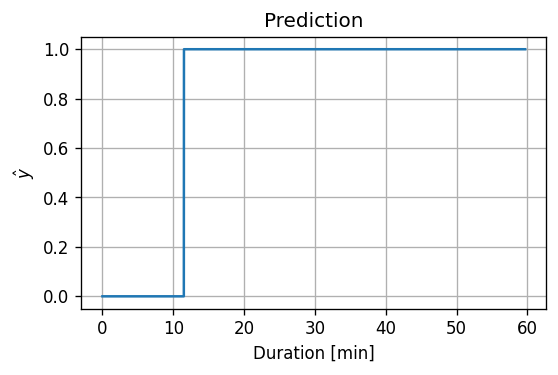

In [ ]:
## Calculate the prediction over the grid
prediction = kde_y1 * prob_y1 >= kde_y0 * prob_y0

## Plot the prediction
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x_grid, prediction)
ax.set_title('Prediction')
ax.set_ylabel('$\hat{y}$')
ax.set_xlabel('Duration [min]')
fig.savefig('./output/nyc_work_hour_predict.png')

In [ ]:
predictions = x_test > 11.4
test_score = (y_test != predictions).mean()
display(Markdown(f'The test score is: {test_score}'))

The test score is: 0.46465